# FDI_DATA

Required libraries:
  1. Pandas
  2. Matplotlib

In [6]:
#import libs

import pandas as pd
import matplotlib.pyplot as plt


In [7]:
#import data
df = pd.read_csv('FDI_in_India.csv')

In [8]:
!ls

FDI_in_India.csv  sample_data


###Generate descriptive statistics.

In [9]:
df.describe()


,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,37.757302,63.931587,42.925714,34.727778,51.090317,87.932540,198.281905,390.085714,498.348571,410.069524,339.413810,557.472698,355.930000,385.703492,490.959841,634.936349,690.131111
std,112.227860,157.878737,86.606439,67.653735,101.934873,206.436967,686.783115,1026.249935,1134.649040,926.814626,627.141139,1031.474056,778.091368,658.429944,837.787060,1335.307706,1411.965354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.200000,0.215000,0.715000,1.230000,4.160000,9.950000,11.950000,7.880000,8.430000,22.720000,15.115000,16.610000,33.800000,30.000000,19.905000
50%,4.030000,5.070000,11.010000,6.370000,9.090000,22.620000,25.820000,58.820000,84.880000,69.740000,58.070000,129.360000,95.410000,113.780000,177.220000,159.130000,110.860000
75%,23.510000,44.830000,36.555000,38.660000,43.205000,63.855000,108.325000,279.270000,383.320000,341.595000,304.280000,593.525000,288.025000,473.060000,595.390000,519.070000,741.220000
max,832.070000,873.230000,419.960000,368.320000,527.900000,1359.970000,4713.780000,6986.170000,6183.490000,5466.130000,3296.090000,5215.980000,4832.980000,3982.890000,4443.260000,6889.460000,8684.070000


###Output the shape and first 5 rows of the dataframe

In [10]:
print(df.shape)
df.head()

(63, 18)


,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


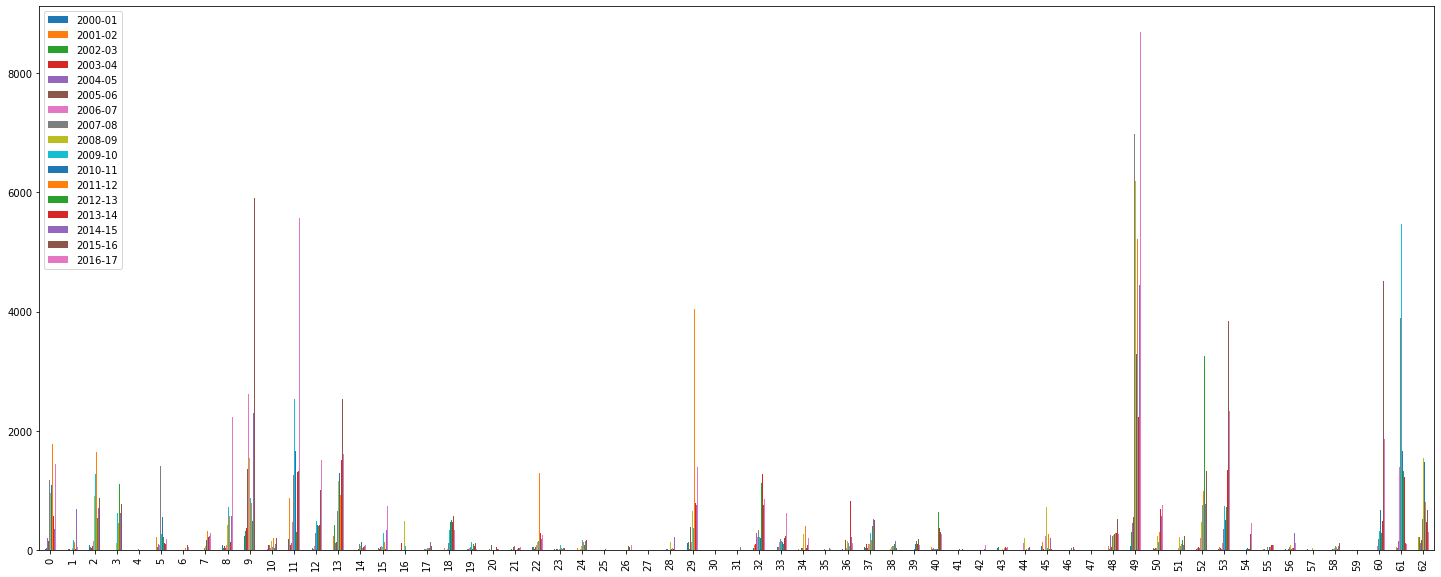

In [11]:
df.plot(figsize=(25,10), kind='bar')

### Setting the index 

In [12]:
df.set_index('Sector',inplace=True)

### Plotting the data after setting the index

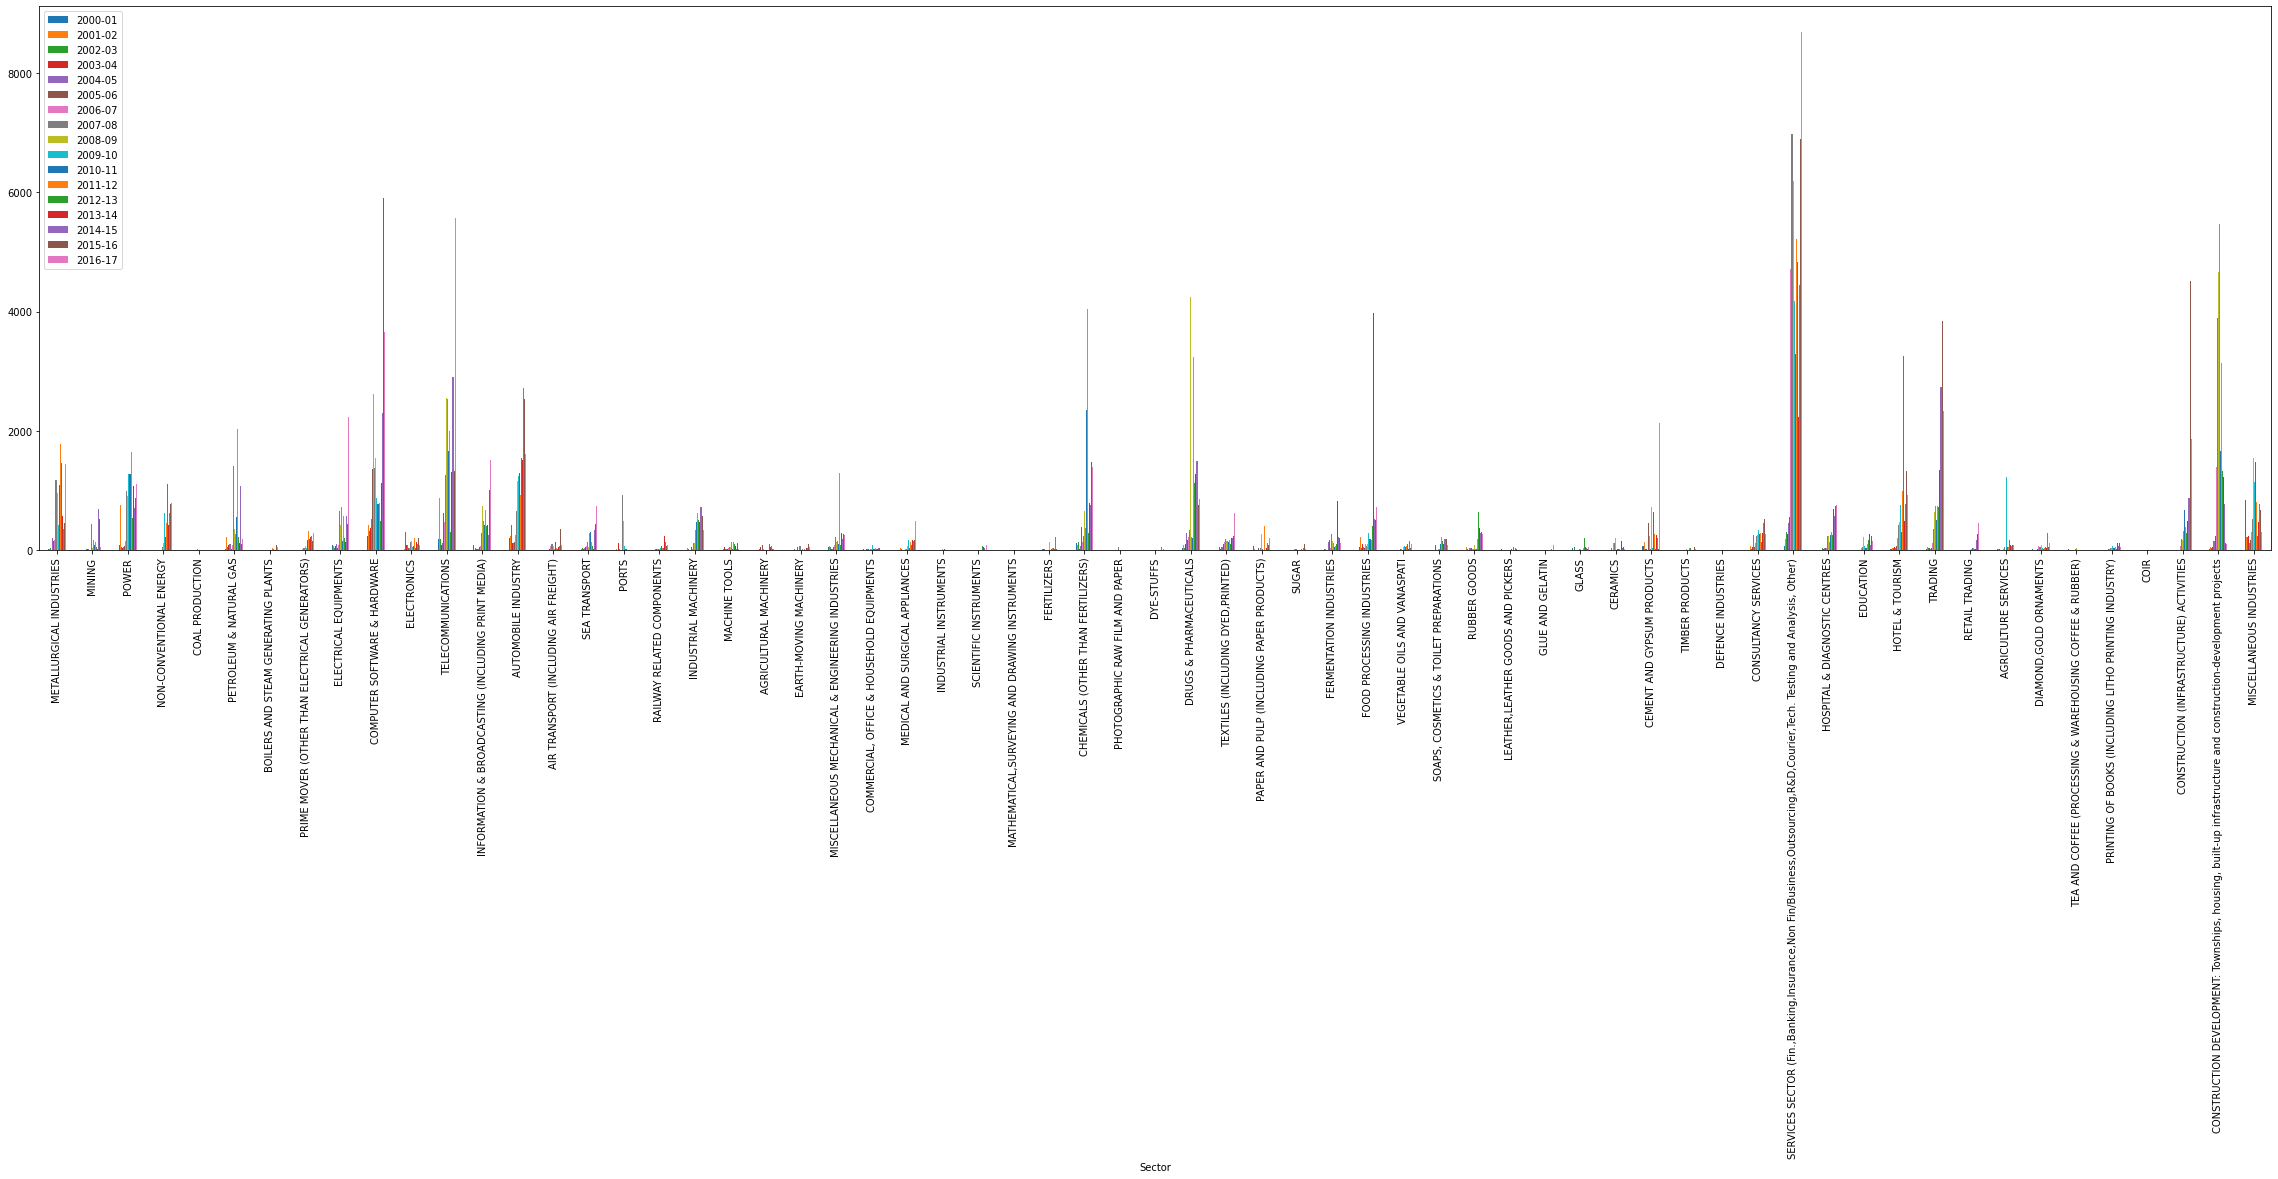

In [13]:
df.plot(kind='bar', figsize = (40,10))

### Plotting the first 4 rows

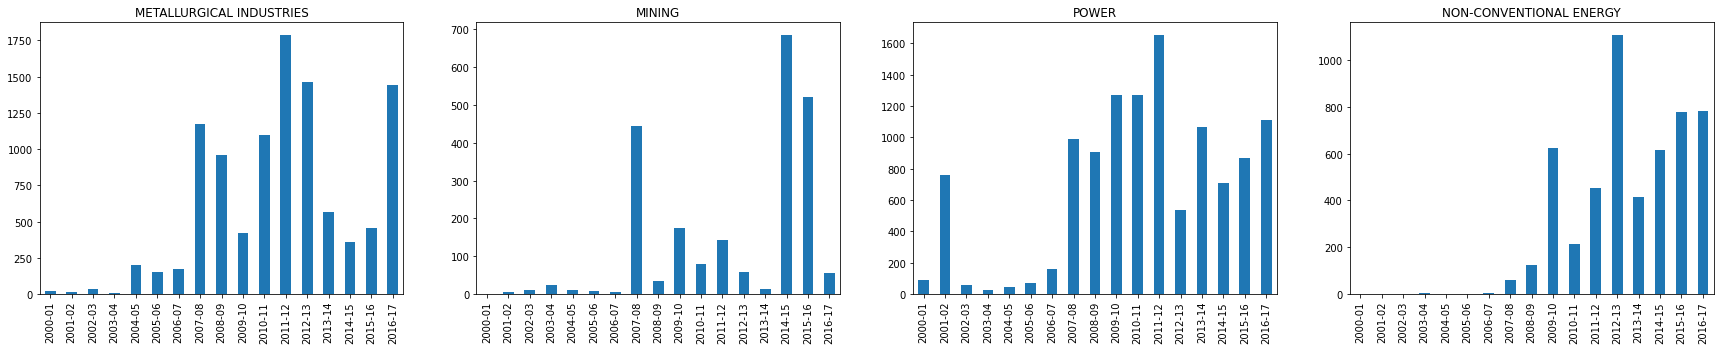

In [14]:

fig, axes = plt.subplots(nrows=1, ncols=4)

for i in range(0,4):
  df.iloc[i].plot(kind='bar',title=df.iloc[i].name, ax = axes[i], figsize=(30,5))


### Looking at the sum of investments in all sectors by year

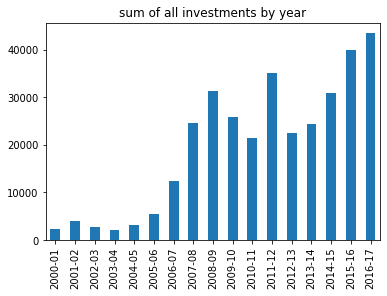

In [15]:
df.sum().plot(kind='bar', title='sum of all investments by year')

### Plotting the sum of invesments of all years by their sector (top 10 sectors)

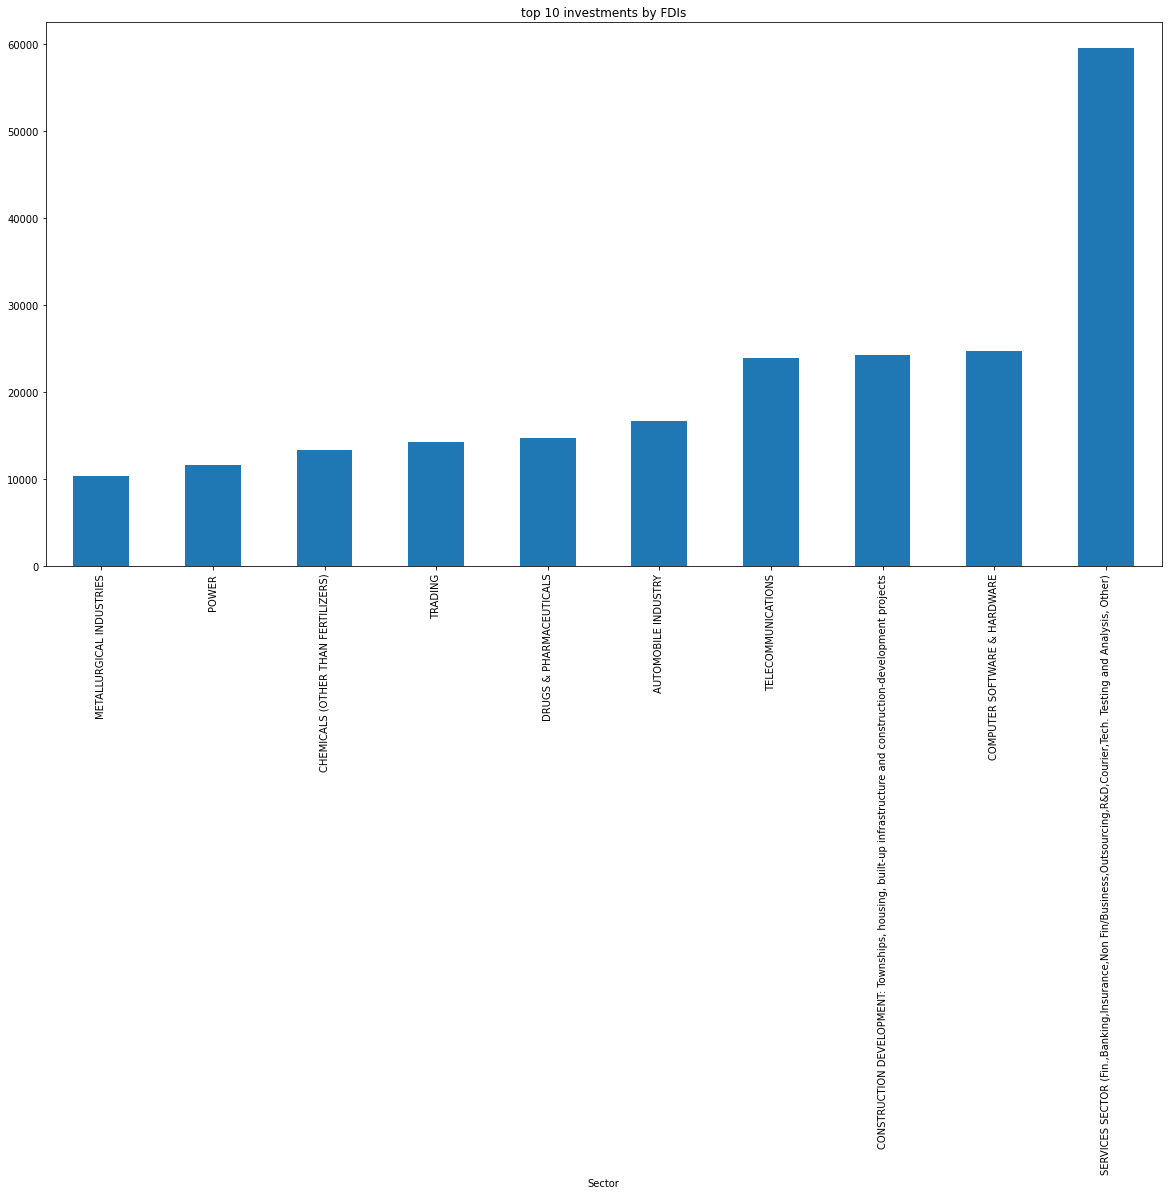

In [16]:
df_trans = df.transpose()
df_trans.sum().sort_values()[-10:].plot(figsize=(20,10),kind='bar', title ='top 10 investments by FDIs')


### Visualizing the correlation among sectors

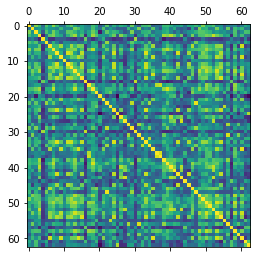

In [17]:
corr = df_trans.corr()
plt.matshow(corr)

### Lets look at the top 10 correlated sectors

In [18]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
get_top_abs_correlations(df_trans,10)

Top Absolute Correlations


Sector                                             Sector                                  
MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES  DEFENCE INDUSTRIES                          0.958449
SUGAR                                              CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES    0.937258
ELECTRICAL EQUIPMENTS                              TEXTILES (INCLUDING DYED,PRINTED)           0.926705
MEDICAL AND SURGICAL APPLIANCES                    TEXTILES (INCLUDING DYED,PRINTED)           0.919642
SEA TRANSPORT                                      RETAIL TRADING                              0.918936
DYE-STUFFS                                         DIAMOND,GOLD ORNAMENTS                      0.916723
AIR TRANSPORT (INCLUDING AIR FREIGHT)              CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES    0.916622
FERMENTATION INDUSTRIES                            FOOD PROCESSING INDUSTRIES                  0.910990
ELECTRICAL EQUIPMENTS                              GLUE AND GELATIN         

### Plotting the Correlated Sectors

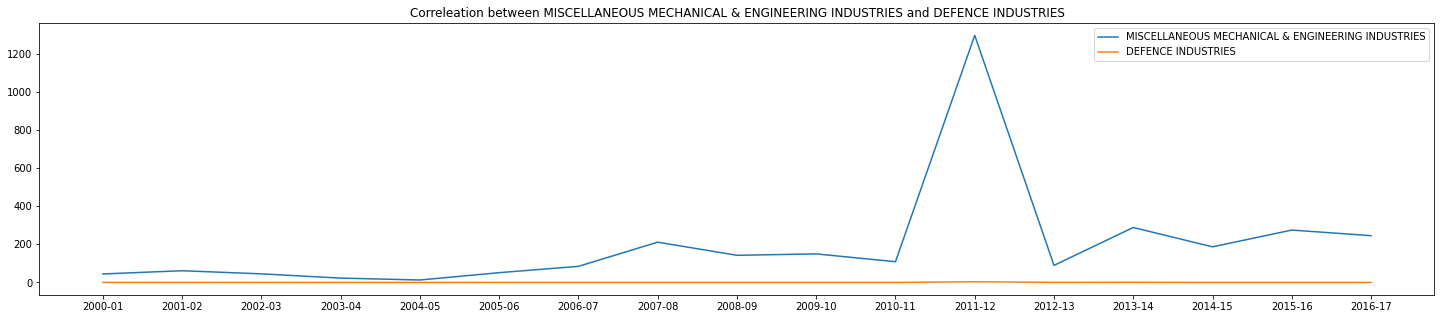

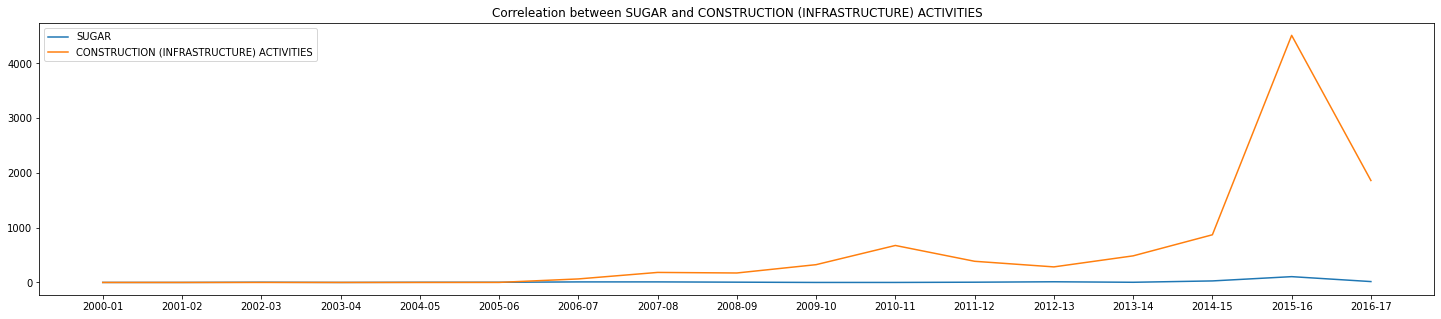

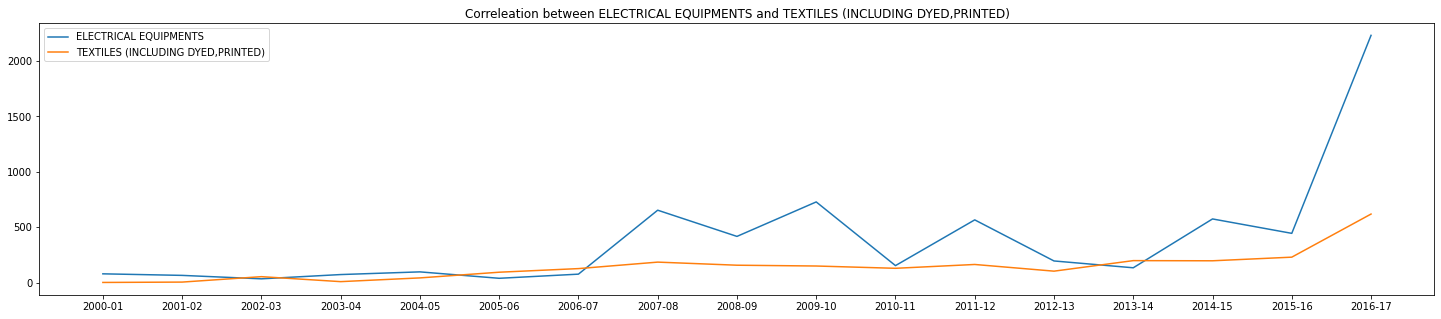

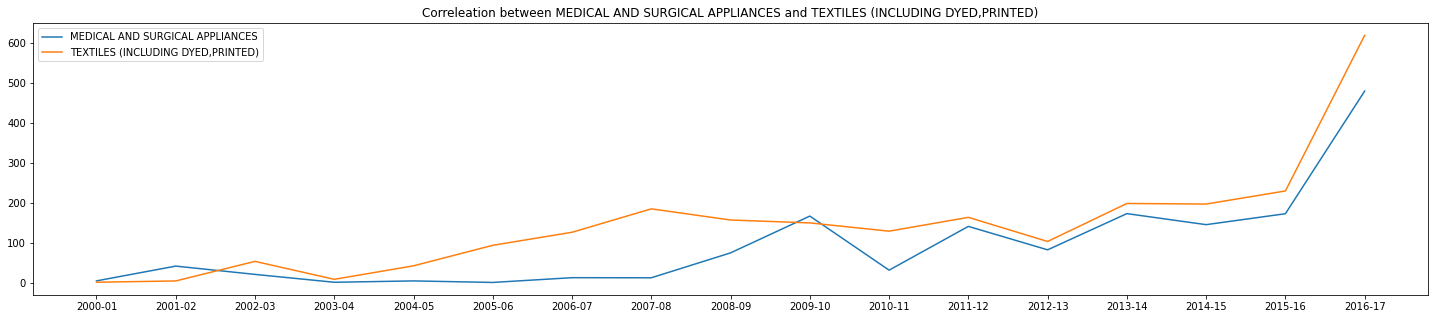

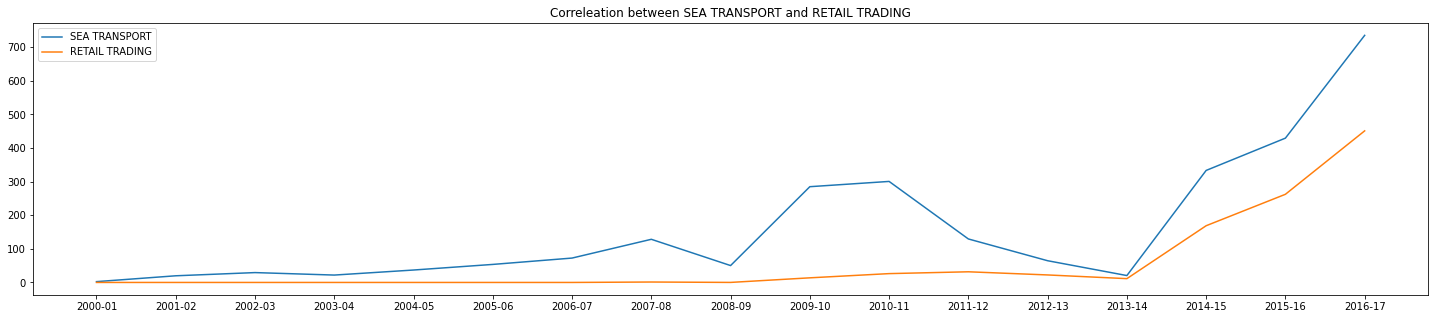

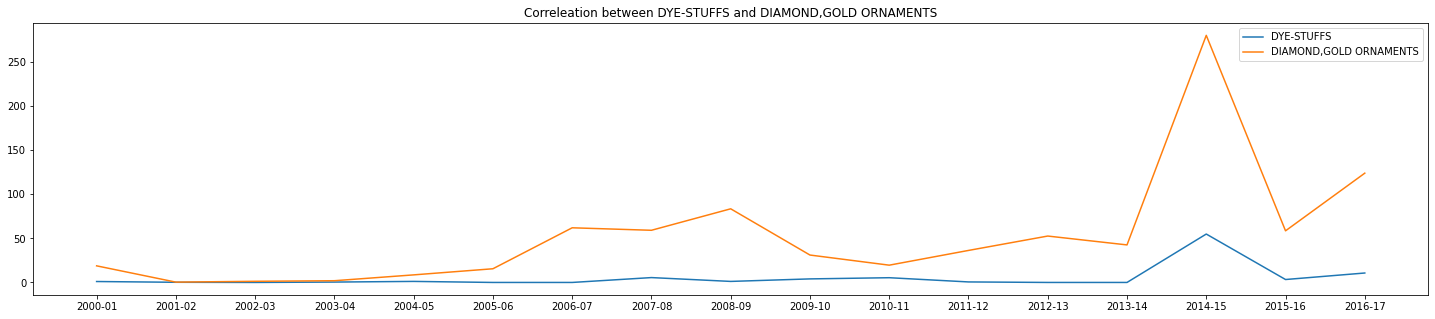

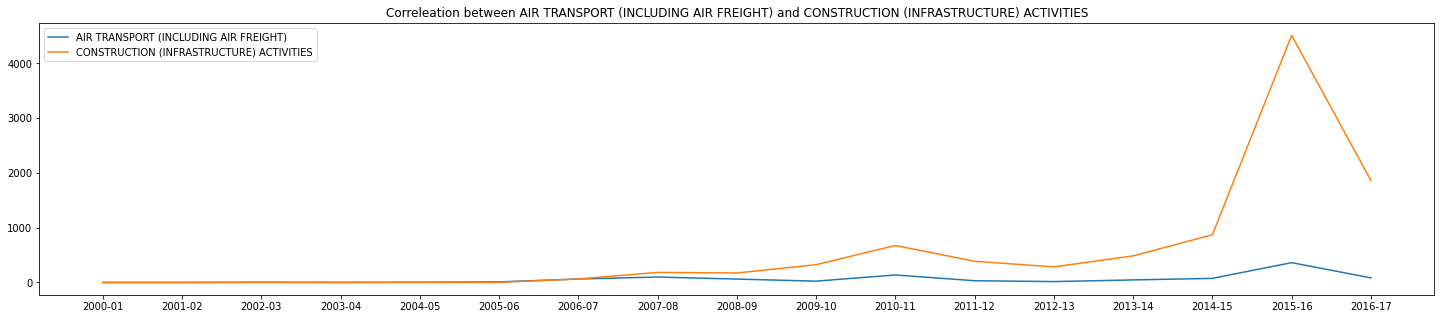

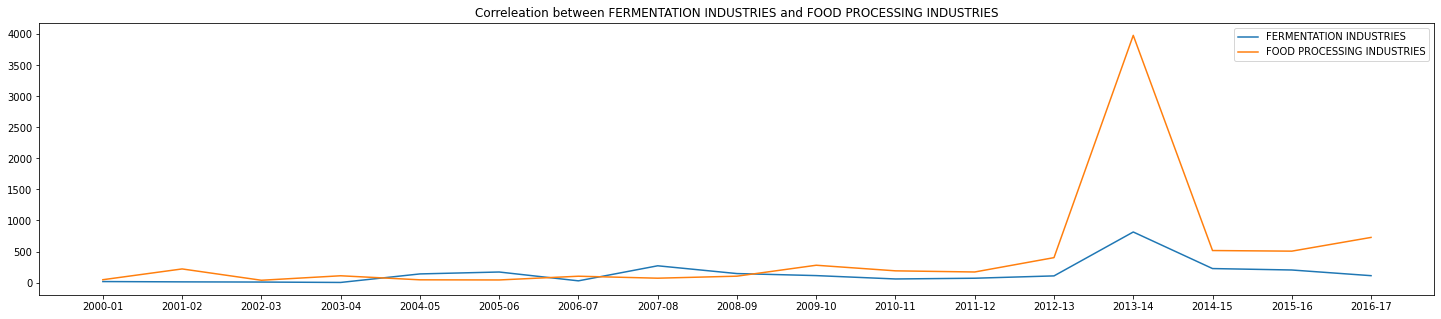

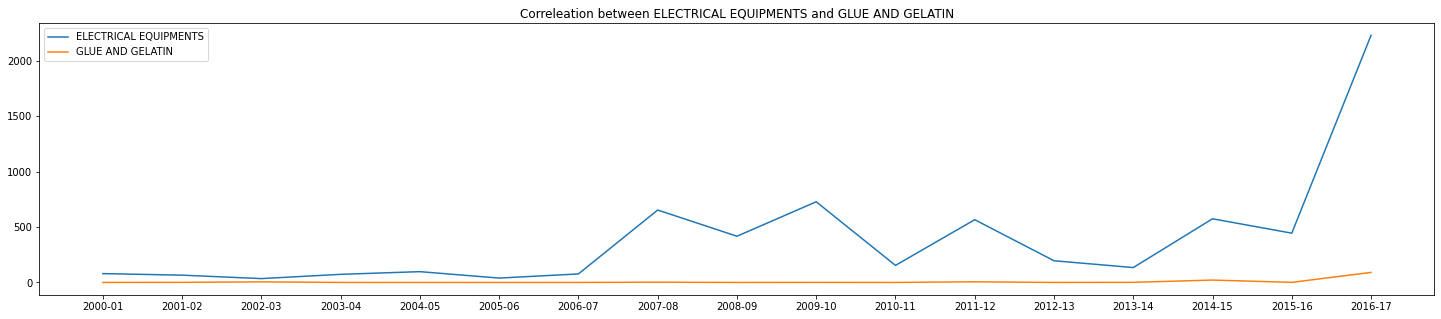

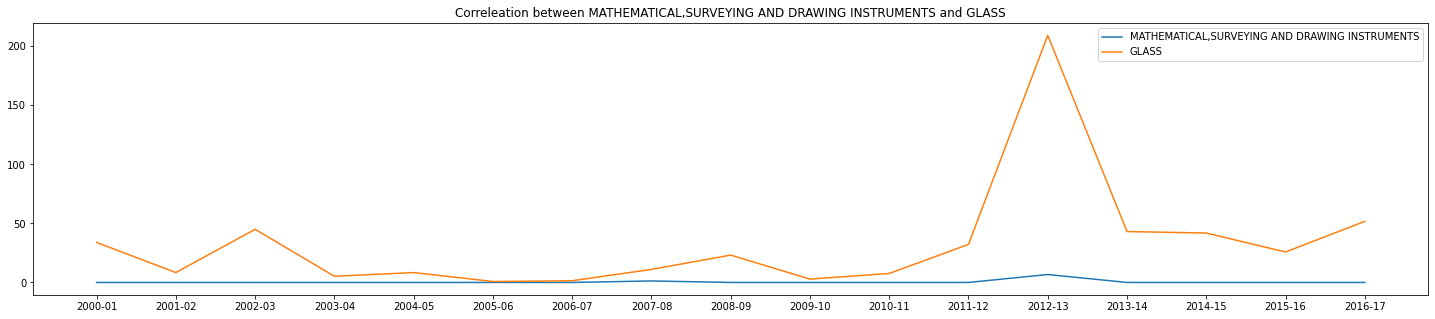

In [19]:
abs_corr = get_top_abs_correlations(df_trans,10)
plt.rcParams['figure.figsize'] = [25, 5]
for i in range(10):
  plt.plot(df.loc[abs_corr.index[i][0]], label = abs_corr.index[i][0])
  plt.plot(df.loc[abs_corr.index[i][1]], label = abs_corr.index[i][1])
  plt.title(f'Correleation between {abs_corr.index[i][0]} and {abs_corr.index[i][1]}')
  plt.legend()
  plt.show()

### Lets look at the 3 most correlated years

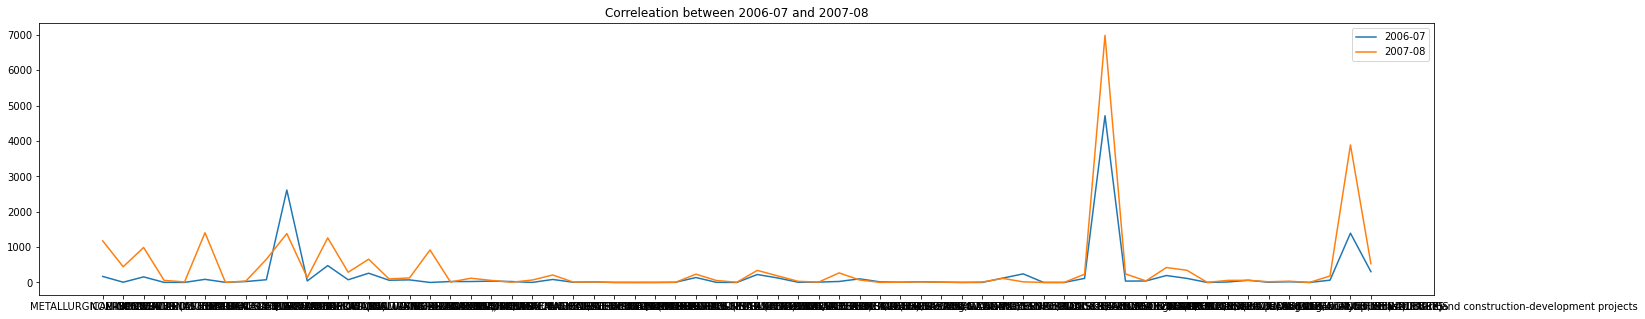

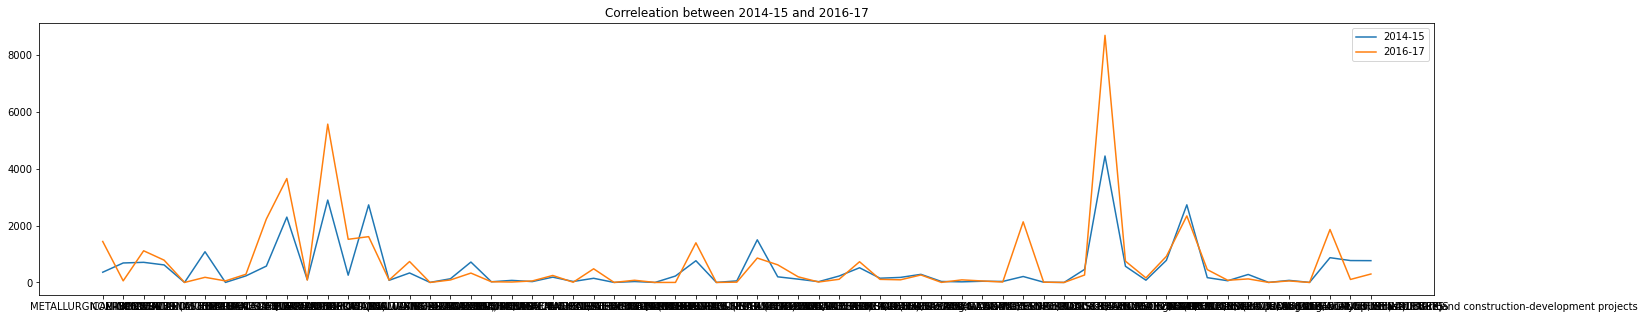

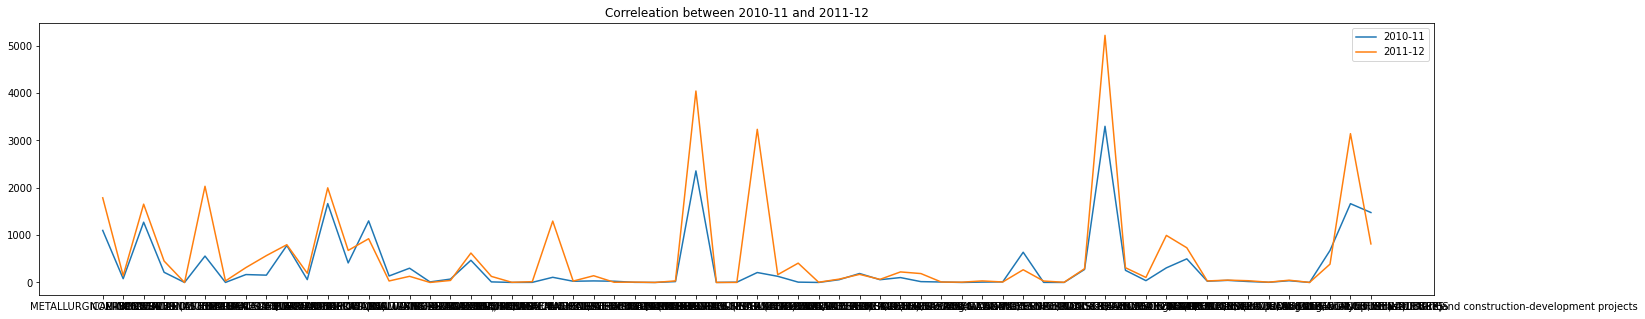

In [20]:
abs_corr = get_top_abs_correlations(df,3)
abs_corr
for i in range(3):
  plt.plot(df_trans.loc[abs_corr.index[i][0]], label = abs_corr.index[i][0])
  plt.plot(df_trans.loc[abs_corr.index[i][1]], label = abs_corr.index[i][1])
  plt.title(f'Correleation between {abs_corr.index[i][0]} and {abs_corr.index[i][1]}')
  plt.legend()
  plt.show()